In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Load the CSV file
mpi_path = './results/mpi/mpi_final.csv'  
numa_path = './results/remote/speedup_numa.csv'
numa2_path = './results/remote/speedup_numa1.csv'
node_path = './results/remote/speedup_node.csv'

mpi = pd.read_csv(mpi_path)
numa = pd.read_csv(numa_path)
numa2 = pd.read_csv(numa2_path)
node = pd.read_csv(node_path) 

In [26]:
# Create a dictionary to store the seq time for each size
def calculate_speedup_efficiency(df):
    seq_times = df[df['method'] == 'seq'].set_index('size')['time'].to_dict()

    # Iterate through the DataFrame and calculate speedup and efficiency
    for index, row in df.iterrows():
        if row['method'] != 'seq':
            seq_time = seq_times.get(row['size'], None)  # Get the seq time for the current size
            if seq_time:
                speedup = seq_time / row['time']
                efficiency = speedup / row['#w']
                df.at[index, 'speedup'] = speedup
                df.at[index, 'efficiency'] = efficiency

    return df

In [27]:
node = calculate_speedup_efficiency(node)


In [28]:
node

,method,size,#w,on-demand,time,speedup,efficiency
0,seq,516,1,0,0.036790,1.000000,1.000000
1,frm,516,1,1,0.041567,0.885077,0.885077
2,par,516,1,1,0.038432,0.957275,0.957275
3,prT,516,1,1,0.039579,0.929533,0.929533
4,frm,516,2,1,0.036344,1.012272,0.506136
...,...,...,...,...,...,...,...
170,par,8192,32,1,25.864716,5.399046,0.168720
171,prT,8192,32,1,22.597714,6.179598,0.193112
172,frm,8192,40,1,161.233555,0.866103,0.021653
173,par,8192,40,1,29.427390,4.745402,0.118635


In [121]:
sizes = data['size'].unique()
sizes

array([ 1024,  2048,  4096,  8192, 10000, 16384])

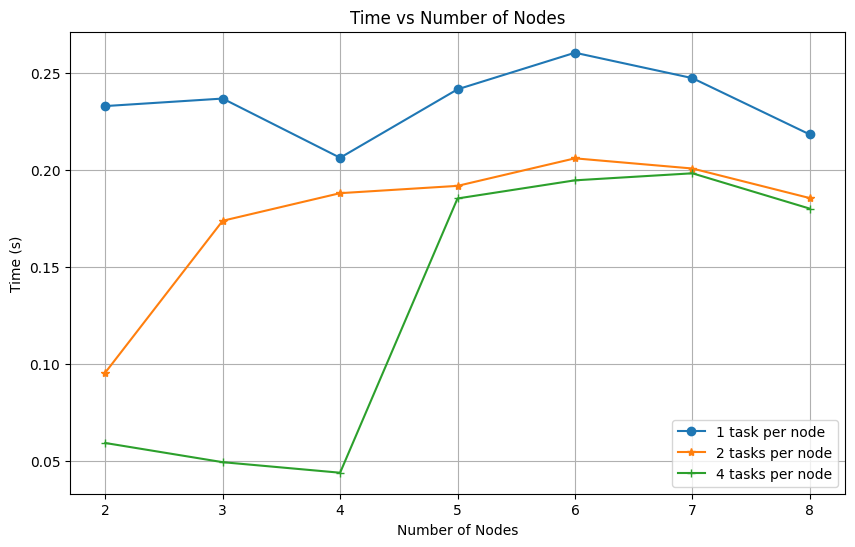

In [122]:
# fixed the size of the matrix to 10000, plot how the times changes with the number of nodes
size = sizes[4]
data_time = data[(data['size'] == size) & (data['task_per_node'] == 1)]
data_time2 = data[(data['size'] == size) & (data['task_per_node'] == 2)]
data_time4 = data[(data['size'] == size) & (data['task_per_node'] == 4)]

plt.figure(figsize=(10, 6))
plt.plot(data_time['nodes'], data_time['time'], marker='o')
plt.plot(data_time2['nodes'], data_time2['time'], marker='*')
plt.plot(data_time4['nodes'], data_time4['time'], marker='+')

# add more line per task per node
plt.xlabel('Number of Nodes')
plt.ylabel('Time (s)')
plt.legend(['1 task per node', '2 tasks per node', '4 tasks per node'])
plt.title('Time vs Number of Nodes')
plt.grid()

plt.savefig(f'./results/plots/mpi_time_vs_nodes_{size}.png')

In [198]:
file_path = './results/remote/speedup_final.csv'
data = pd.read_csv(file_path)

In [124]:
seq = data[data['method'] == 'seq']
frm = data[data['method'] == 'frm']
par = data[data['method'] == 'par']
prT = data[data['method'] == 'prT']


In [125]:
# print the different sizes and put into an array
sizes = seq['size'].values
sizes

array([ 516, 1024, 2048, 4000, 4096, 8001, 8192])

In [126]:
# print all different number of workers unique
workers = data['#w'].unique()
workers

array([ 1,  2,  4,  6,  8, 16, 32])

FileNotFoundError: [Errno 2] No such file or directory: '/home/hoshi/Projects/SPM/SPM-project/test/plots/time_8_.png'

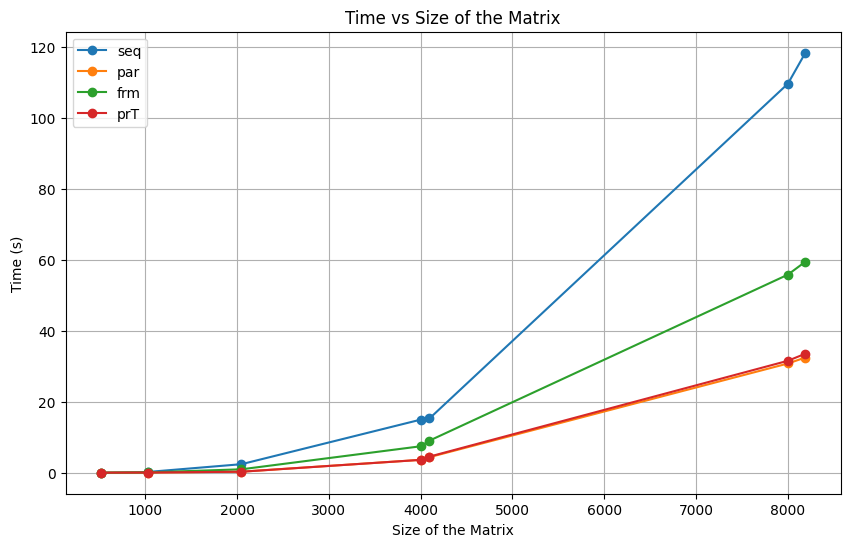

In [128]:
nw = workers[4]

plt.figure(figsize=(10, 6))
plt.plot(seq['size'], seq['time'], marker='o')
plt.plot(par[par['#w'] == nw]['size'], par[par['#w'] == nw]['time'], marker='o')
plt.plot(frm[frm['#w'] == nw]['size'], frm[frm['#w'] == nw]['time'], marker='o')
plt.plot(prT[prT['#w'] == nw]['size'], prT[prT['#w'] == nw]['time'], marker='o')
plt.legend(['seq', 'par', 'frm', 'prT'])
plt.xlabel('Size of the Matrix')
plt.ylabel('Time (s)')
plt.grid()

plt.title('Time vs Size of the Matrix')
plt.savefig(f'./results/plots/time_{nw}_.png')

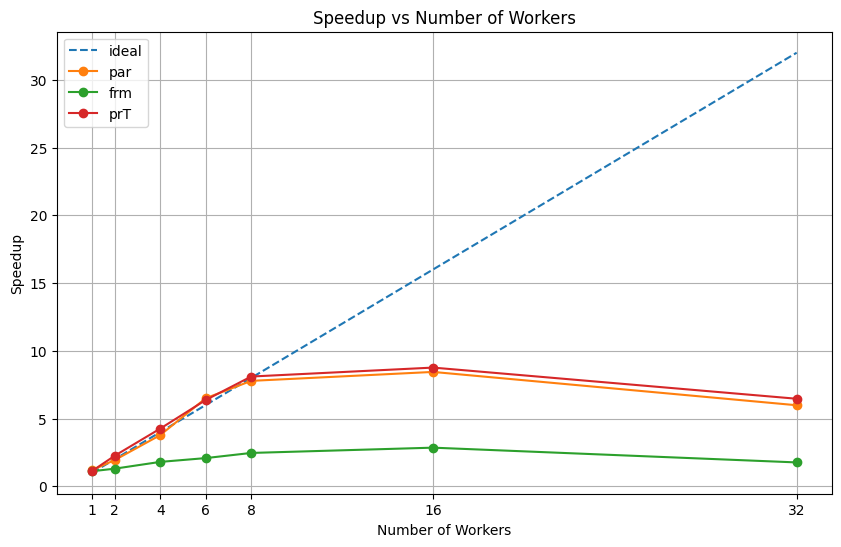

In [ ]:
size = sizes[2]

plt.figure(figsize=(10, 6))
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['#w'], linestyle='--')
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['speedup'], marker='o')
plt.plot(frm[frm['size'] == size]['#w'], frm[frm['size'] == size]['speedup'], marker='o')
plt.plot(prT[prT['size'] == size]['#w'], prT[prT['size'] == size]['speedup'], marker='o')
plt.legend(['ideal', 'par', 'frm', 'prT'])
plt.xlabel('Number of Workers')
plt.ylabel('Speedup')
plt.xticks(par[par['size'] == size]['#w'] )
plt.grid()

plt.title('Speedup vs Number of Workers')
plt.savefig(f'./results/plots/speedup_{size}_.png')


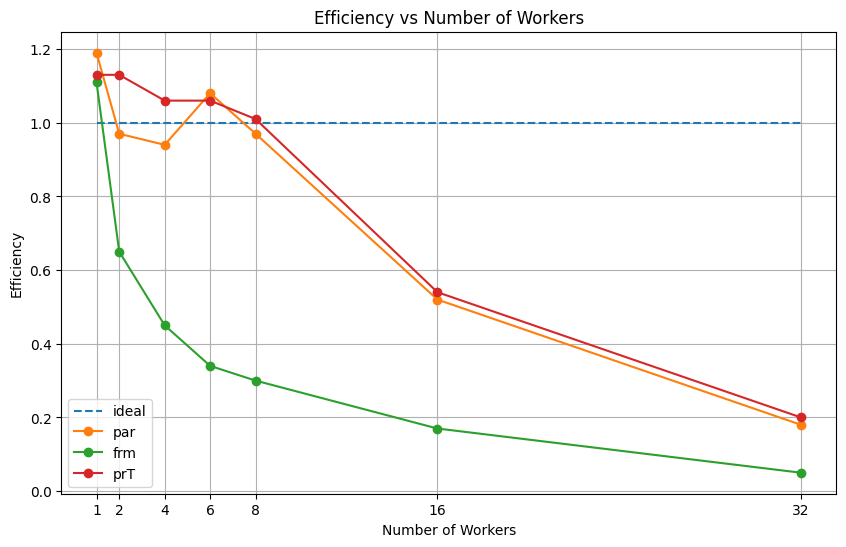

In [ ]:
size = 2048
plt.figure(figsize=(10, 6))
# plot a dotted line for the ideal efficiency
plt.plot(par[par['size'] == size]['#w'], np.ones(len(par[par['size'] == size]['#w'])), linestyle='--')

plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['efficiency'], marker='o')
plt.plot(frm[frm['size'] == size]['#w'], frm[frm['size'] == size]['efficiency'], marker='o')
plt.plot(prT[prT['size'] == size]['#w'], prT[prT['size'] == size]['efficiency'], marker='o')
plt.xlabel('Number of Workers')
plt.ylabel('Efficiency')
plt.xticks(par[par['size'] == size]['#w'])
plt.legend(['ideal', 'par', 'frm', 'prT'])
plt.grid(True)

plt.title('Efficiency vs Number of Workers')
plt.savefig(f'./results/plots/efficiency_{size}_.png')

In [129]:
par['scalability'] = par.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
prT['scalability'] = prT.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
frm['scalability'] = frm.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)

/tmp/ipykernel_3585/903488012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  par['scalability'] = par.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
/tmp/ipykernel_3585/903488012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prT['scalability'] = prT.groupby('size')['time'].transform(lambda x: x.iloc[0] / x)
/tmp/ipykernel_3585/903488012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

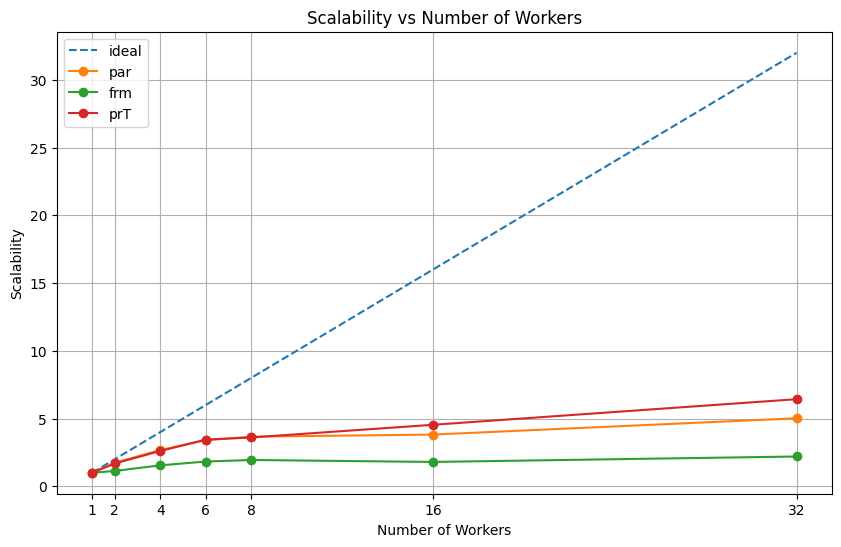

In [184]:
# plot scalability
size = 4096
plt.figure(figsize=(10, 6))
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['#w'], linestyle='--')
plt.plot(par[par['size'] == size]['#w'], par[par['size'] == size]['scalability'], marker='o')
plt.plot(frm[frm['size'] == size]['#w'], frm[frm['size'] == size]['scalability'], marker='o')
plt.plot(prT[prT['size'] == size]['#w'], prT[prT['size'] == size]['scalability'], marker='o')
plt.xlabel('Number of Workers')
plt.ylabel('Scalability')
plt.xticks(par[par['size'] == size]['#w'])
plt.legend(['ideal', 'par', 'frm', 'prT'])
plt.grid(True)

plt.title('Scalability vs Number of Workers')
plt.savefig(f'./results/plots/scalability_{size}_.png')

In [176]:
mpi_path = './results/mpi/mpi_final.csv'
mpi_data = pd.read_csv(mpi_path)

In [177]:
print(mpi_data)

      size  task_per_node  nodes        time
0     1024              1      2    0.233004
1     1024              2      2    0.095630
2     1024              4      2    0.059364
3     1024              1      3    0.236875
4     1024              2      3    0.173886
..     ...            ...    ...         ...
121  16384              2      7  112.501314
122  16384              4      7   99.356979
123  16384              1      8  157.925452
124  16384              2      8   96.010064
125  16384              4      8   90.064427

[126 rows x 4 columns]


In [178]:
# Merge the original DataFrame with seq_df on the 'size' column
merged_df = pd.merge(mpi_data, seq[['size', 'time']], on='size', how='inner', suffixes=('', '_seq'))

# Rename the time column from the seq DataFrame
merged_df.rename(columns={'time_seq': 'seq_time'}, inplace=True)

# Display the merged DataFrame with the new seq_time column
print(merged_df)

    size  task_per_node  nodes       time    seq_time
0   1024              1      2   0.233004    0.227022
1   1024              2      2   0.095630    0.227022
2   1024              4      2   0.059364    0.227022
3   1024              1      3   0.236875    0.227022
4   1024              2      3   0.173886    0.227022
..   ...            ...    ...        ...         ...
79  8192              2      7  16.850216  118.266393
80  8192              4      7  18.180219  118.266393
81  8192              1      8  21.912352  118.266393
82  8192              2      8  14.713023  118.266393
83  8192              4      8  19.526976  118.266393

[84 rows x 5 columns]


In [179]:
# add the speedup column
merged_df['speedup'] = merged_df['seq_time'] / merged_df['time']

# add the efficiency column
merged_df['efficiency'] = merged_df['speedup'] / merged_df['nodes']

In [180]:
merged_df

,size,task_per_node,nodes,time,seq_time,speedup,efficiency
0,1024,1,2,0.233004,0.227022,0.974327,0.487163
1,1024,2,2,0.095630,0.227022,2.373962,1.186981
2,1024,4,2,0.059364,0.227022,3.824237,1.912118
3,1024,1,3,0.236875,0.227022,0.958404,0.319468
4,1024,2,3,0.173886,0.227022,1.305580,0.435193
...,...,...,...,...,...,...,...
79,8192,2,7,16.850216,118.266393,7.018687,1.002670
80,8192,4,7,18.180219,118.266393,6.505224,0.929318
81,8192,1,8,21.912352,118.266393,5.397248,0.674656
82,8192,2,8,14.713023,118.266393,8.038212,1.004776


In [196]:
sizes = merged_df['size'].unique()
size = sizes[3]
# calculate number of processes, number of processes are task per node * nodes

merged_df_time = merged_df[(merged_df['size'] == size) & (merged_df['task_per_node'] == 1)]
merged_df_time2 = merged_df[(merged_df['size'] == size) & (merged_df['task_per_node'] == 2)]
merged_df_time2['speedup'] = merged_df_time2['speedup'] / 2
merged_df_time4 = merged_df[(merged_df['size'] == size) & (merged_df['task_per_node'] == 4)]
merged_df_time4['speedup'] = merged_df_time4['speedup'] / 4

# # calculate number of processes, number of processes are task per node * nodes
# merged_df_time['processes'] = merged_df_time['task_per_node'] * merged_df_time['nodes']
# merged_df_time2['processes'] = merged_df_time2['task_per_node'] * merged_df_time2['nodes']
# merged_df_time4['processes'] = merged_df_time4['task_per_node'] * merged_df_time4['nodes']

/tmp/ipykernel_3585/735936346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_time2['speedup'] = merged_df_time2['speedup'] / 2
/tmp/ipykernel_3585/735936346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_time4['speedup'] = merged_df_time4['speedup'] / 4


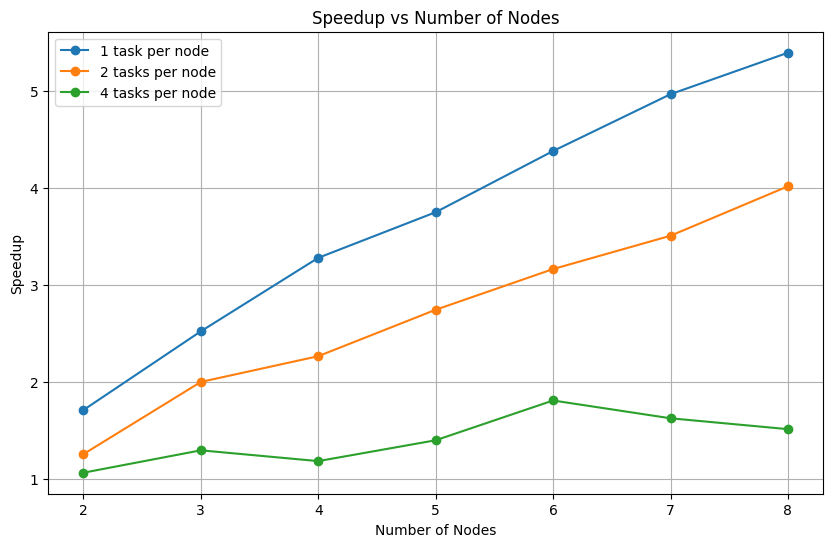

In [197]:
# plot the speedup vs number of processes, number of processes are task per node * nodes

plt.figure(figsize=(10, 6))
plt.plot(merged_df_time['nodes'], merged_df_time['speedup'], marker='o')
plt.plot(merged_df_time2['nodes'], merged_df_time2['speedup'], marker='o')
plt.plot(merged_df_time4['nodes'], merged_df_time4['speedup'], marker='o')

plt.xlabel('Number of Nodes')
plt.ylabel('Speedup')

plt.title('Speedup vs Number of Nodes')
plt.grid()

plt.legend(['1 task per node', '2 tasks per node', '4 tasks per node'])
plt.savefig(f'./results/plots/mpi_speedup_vs_nodes_{size}.png')